#  <span style="color:orange">Multiclass Classification Tutorial (MCLF101) - Level Beginner</span>

**Date Updated: Feb 25, 2020**

# 1.0 Objective of Tutorial
Welcome to Multiclass Classification Tutorial (MCLF101). This tutorial assumes that you are new to PyCaret and looking to get started with Multiclass Classification using `pycaret.classification` Module.

In this tutorial we will learn:


* **Getting Data:**  How to import data from PyCaret repository?
* **Setting up Environment:**  How to setup experiment in PyCaret to get started with building multiclass models?
* **Create Model:**  How to create a model, perform stratified cross validation and evaluate classification metrics?
* **Tune Model:**  How to automatically tune the hyper-parameters of a multiclass model?
* **Plot Model:**  How to analyze model performance using various plots?
* **Finalize Model:** How to finalize the best model at the end of experiment?
* **Predict Model:**  How to make prediction on new / unseen dataset? 
* **Save / Load Model:**  How to save / load model for future use?

Read Time : Approx. 30 Minutes


## 1.1 Installing PyCaret
First step to get started with PyCaret is to install pycaret. Installing pycaret is easy and take few minutes only. Follow the instructions below:

#### Installing PyCaret in Local Jupyter Notebook
`pip install pycaret`  <br />

#### Installing PyCaret on Google Colab or Azure Notebooks
`!pip install pycaret`


## 1.2 Pre-Requisites
- Python 3.x
- Latest version of pycaret
- Internet connection to load data from pycaret's repository
- Basic Knowledge of Multiclass Classification


## 1.3 For Google colab users:
If you are running this notebook on Google colab, below code of cells must be run at top of the notebook to display interactive visuals.<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`


## 1.4 See also:
- __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20(CLF101)%20-%20Level%20Beginner.ipynb)__
- __[Binary Classification Tutorial (CLF102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20(CLF102)%20-%20Level%20Intermediate.ipynb)__

# 2.0 What is Multiclass Classification?
Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification). Multiclass classification should not be confused with multi-label classification, where multiple labels are to be predicted for each instance.

__[Learn More about Multiclass Classification](https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a)__

# 3.0 Overview of Classification Module in PyCaret
PyCaret's classification module `pycaret.classification` is a supervised machine learning module which is used for classifying the elements into binary or multinomial groups based on various techniques and algorithms. PyCaret classification module can be used for Binary or Multiclass classification problems. It has over 18 algorithms and 14 plots to analyze the performance of the model. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's classification module has it all.

# 4.0 Dataset for the Tutorial

For this tutorial we will use **Iris Dataset** from UCI. This is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. Short description are as follows:

- **sepal_length:** Length of Sepal
- **sepal_width:** Width of Sepal
- **petal_length:** Length of Petal
- **petal_width:** Width of Petal
- **species:** One of three class (Setosa, Versicolour, Virginica) `Target Column`

#### Dataset Acknowledgement:
Creator: R.A. Fisher, Donor : Michael Marshall (MARSHALL%PLU '@' io.arc.nasa.gov)

The original dataset and data dictionary can be __[found here.](https://archive.ics.uci.edu/ml/datasets/Iris)__ 

# 5.0 Getting the Data

You can download the data from the original source __[found here](https://archive.ics.uci.edu/ml/datasets/Iris)__ and load it using pandas __[(Learn How)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)__ or you can use PyCaret's data respository to load the data using `get_data()` function (This will require internet connection).

In [1]:
from pycaret.datasets import get_data
dataset = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#check the shape of data
dataset.shape

(150, 5)

In order to demonstrate the `predict_model()` function on unseen data, a sample of 15 records are taken out from original dataset to be used for predictions. This should not be confused with train/test split. This particular split is performed to simulate real life scenario. Another way to think about this is that these 15 records are not available at the time when machine learning experiment was performed.

In [3]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (135, 5)
Unseen Data For Predictions: (15, 5)


# 6.0 Setting up Environment in PyCaret

`setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes two mandatory parameters: pandas dataframe and name of the target column. All other parameters are optional and are used to customize pre-processing pipeline (we will see them in later tutorials).

When `setup()` is executed PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. Although, most of the times the data type is inferred correctly but it's not always the case. Therefore, after `setup()` is executed, PyCaret displays a table containing features and their inferred data types. At which stage, you can inspect and press `enter` to continue if all data types are correctly infered or type `quit` to end the experiment. Identifying data types correctly is of fundamental importance in PyCaret as it automatically performs few pre-processing tasks which are imperative to perform any machine learning experiment. These pre-processing tasks are performed differently for each data type. As such, it is very important that data types are correctly configured.

In later tutorials we will learn how to overwrite PyCaret's infered data type using `numeric_features` and `categorical_features` parameter in `setup()`.

In [4]:
from pycaret.classification import *

In [5]:
exp_mclf101 = setup(data = data, target = 'species', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
3,Original Data,"(135, 5)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Once the setup is succesfully executed it prints the information grid that contains few important information. Much of the information is related to pre-processing pipeline which is constructed when `setup()` is executed. Most of these features are out of scope for the purpose of this tutorial. However, few important things to note at this stage are:

- **session_id :**  A pseduo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. In this experiment session_id is set as `123` for later reproducibility.<br/>
<br/>
- **Target Type :** Binary or Multiclass. Target type is automatically detected and shown. There is on difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.<br/>
<br/>
- **Label Encoded :** When the Target variable is of type string ('Yes' or 'No') instead of 1 or 0. It automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment label encoding is applied as follows: Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2. <br/>
<br/>
- **Original Data :**  Displays the original shape of dataset. In this experiment (135, 5) means 135 samples and 5 features including target column. <br/>
<br/>
- **Missing Values :**  When there are missing values in original data it will show as True. For this experiment there are no missing values in the dataset. <br/>
<br/>
- **Numeric Features :**  Number of features inferred as numeric. In this dataset, 4 out of 5 features are inferred as numeric. <br/>
<br/>
- **Categorical Features :**  Number of features inferred as categorical. In this dataset, there are no categorical features. <br/>
<br/>
- **Transformed Train Set :** Displays the shape of transformed training set. Notice that original shape of (135, 5) is transformed into (94, 4) for transformed train set. Number of samples are distributed between train and test/hold-out set (see below).<br/>
<br/>
- **Transformed Test Set :** Displays the shape of transformed test/hold-out set. There are 41 samples in test/hold-out set. This split is based on default value of 70/30 that can be changed using `train_size` parameter in setup. <br/>

Other than few imperative tasks that are necessary to perform modeling such as missing value imputation and categorical encoding, all the other parameters in `setup()` are optional and out of scope in this tutorial but as you progress to intermediate and expert level, we will cover them in much detail).

# 7.0 Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, Recall, Precision, F1 and Kappa accross the folds (10 by default) of all the available models in the model library.

In [6]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Naive Bayes,0.9567,0,0.9556,0.9619,0.9561,0.9348
1,K Neighbors Classifier,0.9467,0,0.9444,0.9633,0.943,0.9197
2,Extreme Gradient Boosting,0.9467,0,0.9444,0.9633,0.943,0.9197
3,Light Gradient Boosting Machine,0.9467,0,0.9444,0.96,0.9451,0.9197
4,Random Forest Classifier,0.9456,0,0.9444,0.9536,0.9446,0.9182
5,Quadratic Discriminant Analysis,0.9456,0,0.9444,0.9536,0.9446,0.9182
6,Gradient Boosting Classifier,0.9356,0,0.9333,0.9461,0.9343,0.903
7,Extra Trees Classifier,0.9356,0,0.9333,0.9433,0.9337,0.903
8,CatBoost Classifier,0.9356,0,0.9333,0.9433,0.9337,0.903
9,Logistic Regression,0.9244,0,0.9222,0.9345,0.9221,0.8861


Two simple words of code ***(not even a line)*** have created over 15 models using 10 fold stratified cross validation and evaluated 5 most commonly use classification metrics (Accuracy, Recall, Precision, F1, Kappa). The score grid printed above highlights the highest performing metric for comparison purpose only. The grid by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing `sort` parameter. For example `compare_models(sort = 'Recall')` will sort the grid by Recall instead of Accuracy. If you want to change the fold parameter from default value of `10` to a different value then you can use fold parameter. For example `compare_models(fold = 5)` to compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time.

**Note:** `AUC` metric is not available for Multiclass classification, however column will still be shown with `zero` values to maintain consistency between Binary Classification and Multiclass Classification display grid. 

# 8.0 Create a Model

While `compare_models()` is a great function and often a starting point in any experiment, it doesn't return you any trained model. PyCaret's recommended experiment workflow is to use `compare_models()` right after setup to evaluate top performing models and finalize few candidate models to continue the experiment. As such, the function that actually allows to you create a model is unimaginatively called `create_model()`. This function creates a model and scores it using stratified cross validation. Similar to `compare_models()`, the output prints a score grid that shows Accuracy, Recall, Precision, F1 and Kappa by fold. 

For the remaining part of this tutorial, we will work with the below models as our candidate models, our choice of selecting them as candidate model is for illustration purpose only and doesn't necessarily mean they are top performing or ideal model for this type of data.

- Decision Tree Classifier ('dt')
- K Neighbors Classifier ('knn')
- Logistic Regression ('lr')

There are 18 classifiers available in the model library of PyCaret. Please see docstring of `create_model()` for the list of all available models.

### 8.1 Decision Tree Classifier

In [7]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
3,0.9000,0.0,0.8889,0.9250,0.8971,0.8485
4,0.8889,0.0,0.8889,0.9167,0.8857,0.8333
5,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
6,0.8889,0.0,0.8889,0.9167,0.8857,0.8333
7,0.8889,0.0,0.8889,0.9167,0.8857,0.8333
8,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
9,0.6667,0.0,0.6667,0.6667,0.6571,0.5000


In [8]:
#trained model object is stored in the variable 'dt'. 
print(dt)

OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=123,
                                        

### 8.2 K Neighbors Classifier

In [9]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
2,0.9000,0.0,0.8889,0.9250,0.8971,0.8485
3,0.9000,0.0,0.8889,0.9250,0.8971,0.8485
4,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
6,0.8889,0.0,0.8889,0.9167,0.8857,0.8333
7,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
9,0.7778,0.0,0.7778,0.8667,0.7500,0.6667


### 8.3 Logistic Regression

In [10]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9000,0.0,0.8889,0.9200,0.8956,0.8462
1,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
3,0.9000,0.0,0.8889,0.9250,0.8971,0.8485
4,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
6,0.8889,0.0,0.8889,0.9167,0.8857,0.8333
7,0.6667,0.0,0.6667,0.6667,0.6571,0.5000
8,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
9,0.8889,0.0,0.8889,0.9167,0.8857,0.8333


Notice that Mean score of all models matches with the score printed in `compare_models()`. This is because the metrics printed in `compare_models()` score grid are average score of CV folds. Similar to `compare_models()`, if you want to change the fold parameter from default value of 10 to a different value then you can use fold parameter, For Example: `create_model('dt', fold = 5)` to create Decision Tree Classifier using 5 fold stratified CV.

# 9.0 Tune a Model

When a model is created using `create_model()` function, it uses the default hyperparameters of the model. In order to tune the hyperparameter of any model, `tune_model()` function is used. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, Recall, Precision, F1 and Kappa by fold. <br/>
<br/>
**Note:** `tune_model()` does not take a trained model object as an input instead it requires model name to be passed as an abbreviated string similar to how it is passed in `create_model()`. All other functions in `pycaret.classification` requires a trained model object as argument.

### 9.1 Decision Tree Classifier

In [11]:
tuned_dt = tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
4,0.8889,0.0,0.8889,0.9167,0.8857,0.8333
5,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
6,0.8889,0.0,0.8889,0.9167,0.8857,0.8333
7,0.7778,0.0,0.7778,0.7778,0.7778,0.6667
8,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
9,0.7778,0.0,0.7778,0.7778,0.7778,0.6667


In [12]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=2,
                                                     max_features=3,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=4,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=123,
                                           

### 9.2 K Neighbors Classifier

In [13]:
tuned_knn = tune_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
2,0.9000,0.0,0.8889,0.9250,0.8971,0.8485
3,0.9000,0.0,0.8889,0.9250,0.8971,0.8485
4,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
9,0.8889,0.0,0.8889,0.9167,0.8857,0.8333


### 9.3 Logistic Regression

In [14]:
tuned_lr = tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
3,0.9000,0.0,0.8889,0.9250,0.8971,0.8485
4,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
6,0.8889,0.0,0.8889,0.9167,0.8857,0.8333
7,0.8889,0.0,0.8889,0.9167,0.8857,0.8333
8,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
9,0.7778,0.0,0.7778,0.7778,0.7778,0.6667


`tune_model()` function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize `Accuracy` but this can be changed using `optimize` parameter. For example: `tune_model('dt', optimize = 'Recall')` will search for hyperparameters of Decision Tree Classifier that results in highest `Recall`. For the purpose of this example, we have used the default metric `Accuracy` for the sake of simplicity only. How to choose the right metric to evaluate classifier is beyond the scope of this tutorial. However if you would like to learn more about it, you can __[click here](https://medium.com/@george.drakos62/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-3-classification-3eac420ec991)__ to read an article on how to choose the right evaluation metric.

Notice how the results after tuning have been improved:

- Decision Tree Classifier (Before: **`0.9233`** , After: **`0.9333`**)
- K Neighbors Classifier (Before: **`0.9467`** , After: **`0.9689`**)
- Logistic Regression (Before: **`0.9244`** , After: **`0.9456`**)

Although metrics alone are not the only criteria you should consider when finalizing the best model for production. There are few other factors to consider such as training time, standard deviation of kfolds etc. As you progress through the tutorial, we have discussed those factors in detail in Intermediate and Expert levels. For now, let's move forward considering K Neighbors Classifier as our best model. We will complete the remaining tutorial using Tuned K Neighbors Classifier.

# 10.0 Plot a Model

Before finalizing the model, `plot_model()` function can be used to analyze the performance of model over different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are 15 different plots available, please see docstring of `plot_model()` for list of available plots.

### 10.1 Confusion Matrix

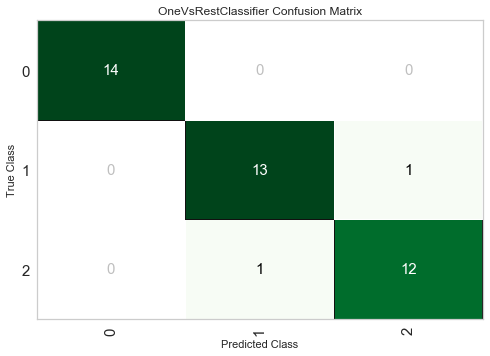

In [15]:
plot_model(tuned_knn, plot = 'confusion_matrix')

### 10.2 Classification Report

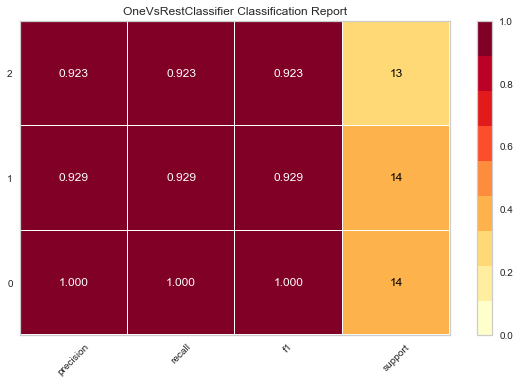

In [16]:
plot_model(tuned_knn, plot = 'class_report')

### 10.3 Decision Boundary Plot

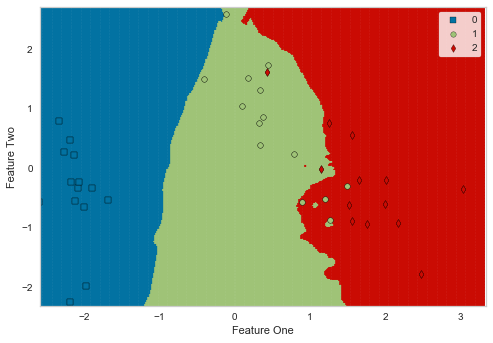

In [17]:
plot_model(tuned_knn, plot='boundary')

### 10.4 Prediction Error Plot

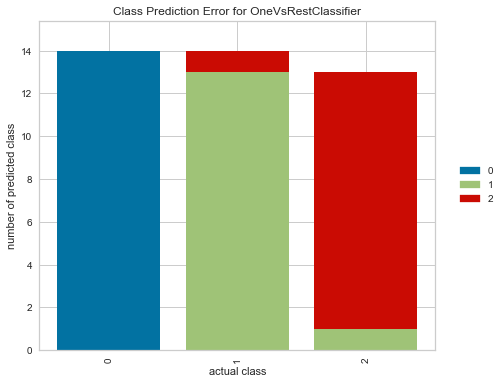

In [18]:
plot_model(tuned_knn, plot = 'error')

Another way to analyze performance of models is to use `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

In [19]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11.0 Predict on test / hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and evaluate metrics on hold-out set. If you see information grid in Section 6 above, you will see that 30% (41 samples) of the data has been separated out as test/hold-out sample. All the evaluation metrics we have seen above is cross validated results based on training set (70%) only. Now using our final trained model stored in `tuned_knn` variable we will predict the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [20]:
predict_model(tuned_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.9512,0,0.9505,0.9512,0.9512,0.9268


Accuracy on test/hold-out set is **`0.9512`** compared to **`0.9689`** achieved on `tuned_knn` CV results (in section 9.2 above). This is not a significant difference. If the difference between test/hold-out and CV results is large, this would normally indicate over-fitting, but could also be due to several other factors and would require investigation. In this case, we will move forward with finalizing this model and predict on unseen data (10% that we had separated in the beginning - that was never exposed to PyCaret).

(TIP : It's always good to look at the standard deviation of CV results when using `create_model()`.

# 12.0 Finalize Model for Deployment

Finalize Model is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by  comparing all models using `compare_models()` and shortlisting few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model which you would like to use for making prediction on new and unseen data. `finalize_model()` function fits the model onto the complete dataset including test/hold-out sample (30% in this case). The purpose of this function is to train the model on complete dataset before it is deployed in production.

In [21]:
final_knn = finalize_model(tuned_knn)

In [22]:
#Final K Nearest Neighbour parameters for deployment
print(final_knn)

OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='euclidean',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=10,
                                                   p=2, weights='distance'),
                    n_jobs=None)


**Caution:** One final word of caution. Once the model is finalized using `finalize_model()`, entire dataset including test/hold-out set is used for training. As such, if the model is used for predictions on hold-out after `finalize_model()`, the information grid printed is misleading as you are trying to predict the same data that was used for modeling. In order to only demonstrate this point, we will use `final_knn` under `predict_model()` to compare the information grid with the one above in section 11. 

In [23]:
predict_model(final_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,1.0,0,1.0,1.0,1.0,1.0


Notice that how all the metrics for `final_knn` are now set to perfect `1.000`. This is because `final_knn` variable is trained on the complete dataset including test/hold-out set.

# 13.0 Predict on unseen data

`predict_model()` function is also used to predict the unseen dataset. The only difference from section 11 above is this time we will pass `data_unseen` in data parameter of `predict_model()`. `data_unseen` is the variable created in the beginning and it contains 10% (15 samples) of the original dataset that was never exposed to PyCaret. (see section 5 for explanation)

In [24]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,7.7,3.0,6.1,2.3,Iris-virginica,2,1.0
1,6.3,3.4,5.6,2.4,Iris-virginica,2,1.0
2,6.4,3.1,5.5,1.8,Iris-virginica,2,1.0
3,6.0,3.0,4.8,1.8,Iris-virginica,2,1.0
4,6.9,3.1,5.4,2.1,Iris-virginica,2,1.0


`Label` and `Score` columns are added into the `data_unseen`. Label is the prediction and score is the probability of prediction. Notice that predicted results are concated to the original dataset while all the transformations are automatically performed in the background.

# 14.0 Saving the model

We have now finished the experiment by finalizing the `tuned_knn` model which is now stored in `final_knn` variable. We have also used model stored in `final_knn` to predict `data_unseen`. This brings us to the end our experiment but one question is still to be asked. What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is No, you don't need to rerun the entire experiment and reconstruct the pipeline to generate predictions on new data. PyCaret inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [25]:
save_model(final_knn,'Final KNN Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

# 15.0 Loading the saved model

To load a saved model on a future date in the same or different environment, we would use the PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction

In [26]:
saved_final_knn = load_model('Final KNN Model 08Feb2020')

Transformation Pipeline and Model Sucessfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function . Below we have applied the loaded model to predict the same `data_unseen` that we have used in section 13 above.

In [27]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)

In [28]:
new_prediction.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,7.7,3.0,6.1,2.3,Iris-virginica,2,1.0
1,6.3,3.4,5.6,2.4,Iris-virginica,2,1.0
2,6.4,3.1,5.5,1.8,Iris-virginica,2,1.0
3,6.0,3.0,4.8,1.8,Iris-virginica,2,1.0
4,6.9,3.1,5.4,2.1,Iris-virginica,2,1.0


Notice that results of `unseen_predictions` and `new_prediction` are identical.

# 16.0 Wrap-up / Next Steps?

What we have covered in this tutorial is the entire machine learning pipeline from data ingestion, pre-processing, training the model, hyperparameter tuning, prediction and saving the model for later use. We have completed all this in less than 10 commands which are naturally constructed and very intuitive to remember such as `create_model()`, `tune_model()`, `compare_models()`. Re-creating the entire experiment without PyCaret would have taken well over 100 lines of code in most of the libraries.

In this tutorial, we have only covered basics of `pycaret.classification`. In the following tutorials, we will go deeper into advance pre-processing techniques that allows you to fully customize your machine learning pipeline, ensembling and generalized stacking and other advance techniques that are must to know for any data scientist. 